# Calculate the XRD Pattern of Co3O4 
COID = 1526734

lattice infos 
8.065 0.0 4.938388217561701e-16
-4.938388217561701e-16 8.065 4.938388217561701e-16
0.0 0.0 8.065


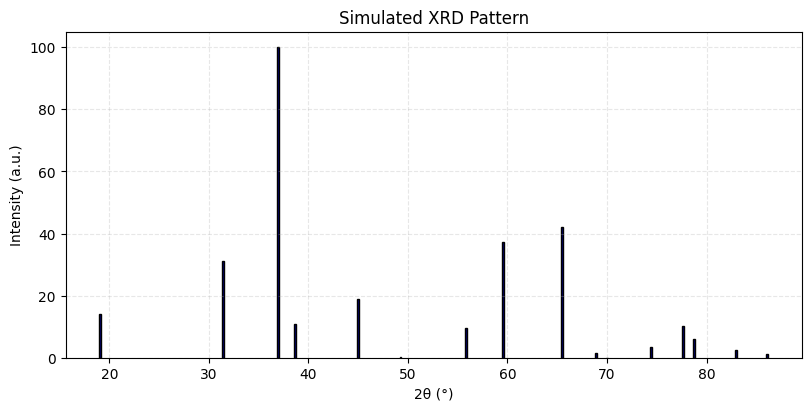

hkl indices: 
[[{'hkl': (1, 1, 1), 'multiplicity': 8}], [{'hkl': (2, 2, 0), 'multiplicity': 12}], [{'hkl': (3, 1, 1), 'multiplicity': 24}], [{'hkl': (2, 2, 2), 'multiplicity': 8}], [{'hkl': (4, 0, 0), 'multiplicity': 6}], [{'hkl': (3, 3, 1), 'multiplicity': 24}], [{'hkl': (4, 2, 2), 'multiplicity': 24}], [{'hkl': (5, 1, 1), 'multiplicity': 24}, {'hkl': (3, 3, 3), 'multiplicity': 8}], [{'hkl': (4, 4, 0), 'multiplicity': 12}], [{'hkl': (5, 3, 1), 'multiplicity': 48}], [{'hkl': (6, 0, 0), 'multiplicity': 6}, {'hkl': (4, 4, 2), 'multiplicity': 24}], [{'hkl': (6, 2, 0), 'multiplicity': 24}], [{'hkl': (5, 3, 3), 'multiplicity': 24}], [{'hkl': (6, 2, 2), 'multiplicity': 24}], [{'hkl': (4, 4, 4), 'multiplicity': 8}], [{'hkl': (5, 5, 1), 'multiplicity': 24}, {'hkl': (7, 1, 1), 'multiplicity': 24}]]


In [1]:
from pymatgen.core import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt

# Load structure from CIF
structure = Structure.from_file("1526734.cif")
print(f'lattice infos \n{structure.lattice}')
# Calculate XRD pattern
xrd = XRDCalculator(wavelength="CuKa")
pattern = xrd.get_pattern(structure)

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout = True)
ax.bar(pattern.x, pattern.y, width=0.2, color='navy', edgecolor='black')
ax.set_xlabel("2θ (°)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("Simulated XRD Pattern")
ax.grid(True, linestyle='--', alpha=0.3)
plt.show()
print(f'hkl indices: \n{pattern.hkls}')

# Perform the Analysis of a PXRD Data Set
1. Load the data from CPY-131_repro_calc and perform a background correction
2. Calculate the XRD pattern for $\mathrm{Co_3O_4}$
3. Fit Psydo-Voigt profiles to the diffraction peaks
4. Make a plot of the raw data + fits and save the results to .txt

<>:122: SyntaxWarning: invalid escape sequence '\m'
<>:124: SyntaxWarning: invalid escape sequence '\T'
<>:135: SyntaxWarning: invalid escape sequence '\m'
<>:122: SyntaxWarning: invalid escape sequence '\m'
<>:124: SyntaxWarning: invalid escape sequence '\T'
<>:135: SyntaxWarning: invalid escape sequence '\m'
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_14662/3713941196.py:122: SyntaxWarning: invalid escape sequence '\m'
  axs.plot(two_theta, counts_smoothed, color = colors_all[1], linestyle = '', marker = 'o', fillstyle = 'none', markersize = 2, label = '$\mathrm{Co_3O_4}$ nanoparticles')
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_14662/3713941196.py:124: SyntaxWarning: invalid escape sequence '\T'
  axs.set_xlabel('2 $\Theta$ (°)')
/var/folders/f2/krn3py8536556jbm969hx5380000gn/T/ipykernel_14662/3713941196.py:135: SyntaxWarning: invalid escape sequence '\m'
  axs.bar(pattern.x, pattern.y*np.max(counts_smoothed)/200, width=0.2, color='navy', edgecolor='b

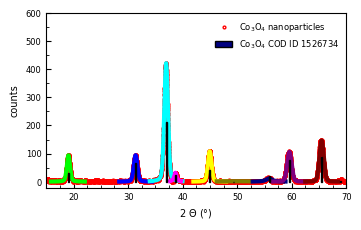

In [2]:
import pandas as pd
import numpy as np
from lmfit.models import PseudoVoigtModel
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from skimage.restoration import rolling_ball
from scipy.signal import savgol_filter
from matplotlib.ticker import AutoMinorLocator

file = 'PXRD_cpy_131_repro_calc.xy'

data = pd.read_csv(file, sep= ' ', header = None)
counts = data[1]
counts_smoothed = savgol_filter(counts, 17,1)
two_theta = data[0].to_numpy()
background = rolling_ball(counts_smoothed, radius=100)
counts_smoothed-=background
n_peaks = 9

peak_positions  = pattern.x[:n_peaks]
peak_widths     = np.ones_like(peak_positions)*2
peak_amplitudes = pattern.y[:n_peaks]
peak_start      = pattern.x[:n_peaks]-3
peak_stop       = pattern.x[:n_peaks]+3
peak_start[3]   = pattern.x[3]-1
peak_stop[3]    = pattern.x[3]+1


lambd = 1.54e-10

colors_all = [
        (0/255,0/255,0/255), (255/255,0/255,0/255), (0/255,255/255,0/255), (0/255,0/255,255/255),
        (0/255,255/255,255/255), (255/255,0/255,255/255), (255/255,255/255,0/255), (128/255,128/255,0/255),
        (0/255,0/255,128/255), (128/255,0/255,128/255), (128/255,0/255,0/255), (0/255,128/255,0/255), (0/255,128/255,128/255),
        (0/255,0/255,160/255), (255/255,128/255,0/255), (128/255,0/255,255/255), (255/255,0/255,128/255),
        (255/255,255/255,255/255), (0/255,0/255,0/255), (192/255,192/255,192/255), (128/255,128/255,128/255)]



    
def make_model(num):
    #pref = "f{0}_".format(num)
    model = PseudoVoigtModel()#prefix = pref)
    model.set_param_hint('amplitude', value=peak_amplitudes[num], min=0, max=np.inf, vary = True)
    model.set_param_hint('center',    value=peak_positions[num], min=peak_positions[num]-1, max=peak_positions[num]+1, vary = False)
    model.set_param_hint('fraction',  value=0.1,  vary = True)
    model.set_param_hint('sigma',     value=peak_widths[num], min=0, max=5., vary = True)

    return model

def save_fits(x_exp, y_exp, x_fit, ys_fit, names, params, errs, fname):
    fit_labels    = np.zeros(n_peaks+1, dtype = 'U32')
    fit_labels[0] = '2Theta'
    for i_peak in range(1, n_peaks+1): 
        fit_labels[i_peak] = 'counts fit {}'.format(i_peak)
    file = open(fname, 'w+')
    data = np.zeros((n_peaks + 1, len(ys_fit[0,:])))
    data[0,:] = x_fit; data[1:,:] =  ys_fit; dataframe = pd.DataFrame(np.transpose(data))
    dataframe.to_csv(path_or_buf=file, sep = '\t', header = fit_labels)
    file.close()
    file = open(fname, 'a+')
    data = np.zeros((2, len(y_exp)))
    data[0,:] = x_exp; data[1,:] =  y_exp; dataframe = pd.DataFrame(np.transpose(data))
    dataframe.to_csv(path_or_buf=file, sep = '\t', header = ['angle', 'intensity'])
    file.close()
    file = open(fname, 'a+')
    out_data_pars = np.zeros((len(params), 3), dtype = 'U32')
    out_data_pars[:,0] = names
    out_data_pars[:,1] = params
    out_data_pars[:,2] = errs
    dataframe = pd.DataFrame(out_data_pars)
    dataframe.to_csv(path_or_buf=fname, sep = '\t')

def find_index(array, value): 
    index = np.argmin(np.abs(array-value))
    return index

def calc_size(FWHM, _2Theta): 
    D = 1.*lambd/(FWHM*2*np.pi/360*np.cos(_2Theta*2*np.pi/360))
    return D



names  = np.array([])
params = np.array([])
errs   = np.array([])
fits   = np.ones((n_peaks, len(two_theta)*100))*np.nan 
angle_fit = np.linspace(start=two_theta[0], stop=two_theta[-1], num = len(two_theta)*100)
sizes  = np.array([])
mod = None
for i_peak in range(n_peaks):
    start = find_index(array = two_theta, value = peak_start[i_peak])
    stop = find_index(array = two_theta, value = peak_stop[i_peak])
    mod = make_model(i_peak)
    out=mod.fit(counts_smoothed[start:stop], x=two_theta[start:stop], method ='trf')
    for name, param in out.params.items():
        #print(f'{name:7s}\t {param.value:11.5f}\t {param.stderr:11.5f}\r')
        names  = np.append(names, name)
        params = np.append(params, param.value)
        errs   = np.append(errs, param.stderr)
    fits[i_peak, :] = mod.eval(x = angle_fit, amplitude = params[-6], center = params[-5], sigma = params[-4], fraction = params[-3] )
    sizes = np.append(sizes, calc_size(FWHM = params[-2], _2Theta = params[-5]))




save_fits(x_exp = two_theta, y_exp = counts_smoothed, x_fit= angle_fit, ys_fit = fits, names = names, params = params, errs = errs, fname = f'{file[:-3]}_result.txt')

Labels = [entry[0]['hkl'] for entry in pattern.hkls]
# Legend
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['legend.frameon'] = False
# Axes
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['axes.titlesize'] = 7
# Ticks
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
fig, axs = plt.subplots(nrows=1, ncols=1, sharex = 'col', figsize = [3.5,3.5/1.6], constrained_layout=True)#, gridspec_kw = {'width_ratios' :[2, 1]})
axs.tick_params(which = 'both', bottom=True, left=True, direction ='in')
axs.plot(two_theta, counts_smoothed, color = colors_all[1], linestyle = '', marker = 'o', fillstyle = 'none', markersize = 2, label = '$\mathrm{Co_3O_4}$ nanoparticles')
axs.set_ylabel('counts')
axs.set_xlabel('2 $\Theta$ (°)')
axs.set_ylim(top = 600)
axs.set_xlim(left = 15, right = 70)
for i_peak in range(n_peaks): 
    start = find_index(array = angle_fit, value = peak_start[i_peak])
    stop = find_index(array = angle_fit, value = peak_stop[i_peak])
    if i_peak == 0: 
        start = start - 2000
    axs.plot(angle_fit[start:stop], fits[i_peak, start:stop], color = colors_all[i_peak+2], linewidth = 3)
axs.yaxis.set_minor_locator(AutoMinorLocator(n = 2))
axs.xaxis.set_minor_locator(AutoMinorLocator(n = 4))
axs.bar(pattern.x, pattern.y*np.max(counts_smoothed)/200, width=0.2, color='navy', edgecolor='black', label = '$\mathrm{Co_3O_4}$ COD ID 1526734', zorder=10)
axs.legend()
plt.savefig(f'{file[:-3]}_result.tif', dpi = 600, pil_kwargs={"compression": "tiff_lzw"}, bbox_inches='tight')
plt.show()